In [2]:
from sympy import *
from sympy.physics.mechanics import *
init_vprinting()

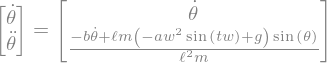

In [7]:
# define our symbolic variables
m, g, ell, a, w, b, t = symbols('m g ell a w b t')

# dynamic symbols have implicit dependence on time
theta = dynamicsymbols('theta')

# x and y position of the pendulum
x = ell*sin(theta)
y = ell*cos(theta) + a*sin(w*t)

# take time derivatives
theta_dot = diff(theta, t)
theta_ddot = diff(theta_dot, t)
x_dot = diff(x,t)
y_dot = diff(y,t)

# define our kinetic, potential energy, and Lagrangian
T = 1/2*m*(x_dot**2 + y_dot**2)
V = m*g*y
L = T - V

# solve the Euler-Lagrange Equations
eqn_1 = diff( diff(L,theta_dot), t) - diff(L, theta) + b*theta_dot # with damping
# eqn_1 = diff( diff(L,theta_dot), t) - diff(L, theta) # no damping
sln = solve(eqn_1, theta_ddot)[0]

# show the solution in state-space form
f = Matrix([theta_dot, sln])
f = simplify(f)
q = Matrix([theta, theta_dot])
q_dot = diff(q,t)

Eq(q_dot, f)

In [8]:
# write each row of f in ASCII text, suitable for inclusion in simulation code
g = f.subs({theta: 'theta', theta_dot: 'theta_dot'})
for i in range(2):
    print('f[{}] = {}'.format(i, g[i]))

f[0] = theta_dot
f[1] = (-b*theta_dot + ell*m*(-a*w**2*sin(t*w) + g)*sin(theta))/(ell**2*m)
